<a href="https://colab.research.google.com/github/Cansuuzum-38/BreastUltrasound-Image-Clasification/blob/main/BreastUltrasoundImagesDN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cansuzm","key":"2af7fc1223fe70fdac22bc3d1f2c5c50"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d cansuzm/BreastUltrasoundImages

Dataset URL: https://www.kaggle.com/datasets/cansuzm/BreastUltrasoundImages
License(s): unknown
100% 194M/195M [00:11<00:00, 21.5MB/s]
100% 195M/195M [00:11<00:00, 17.6MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile('BreastUltrasoundImages.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)

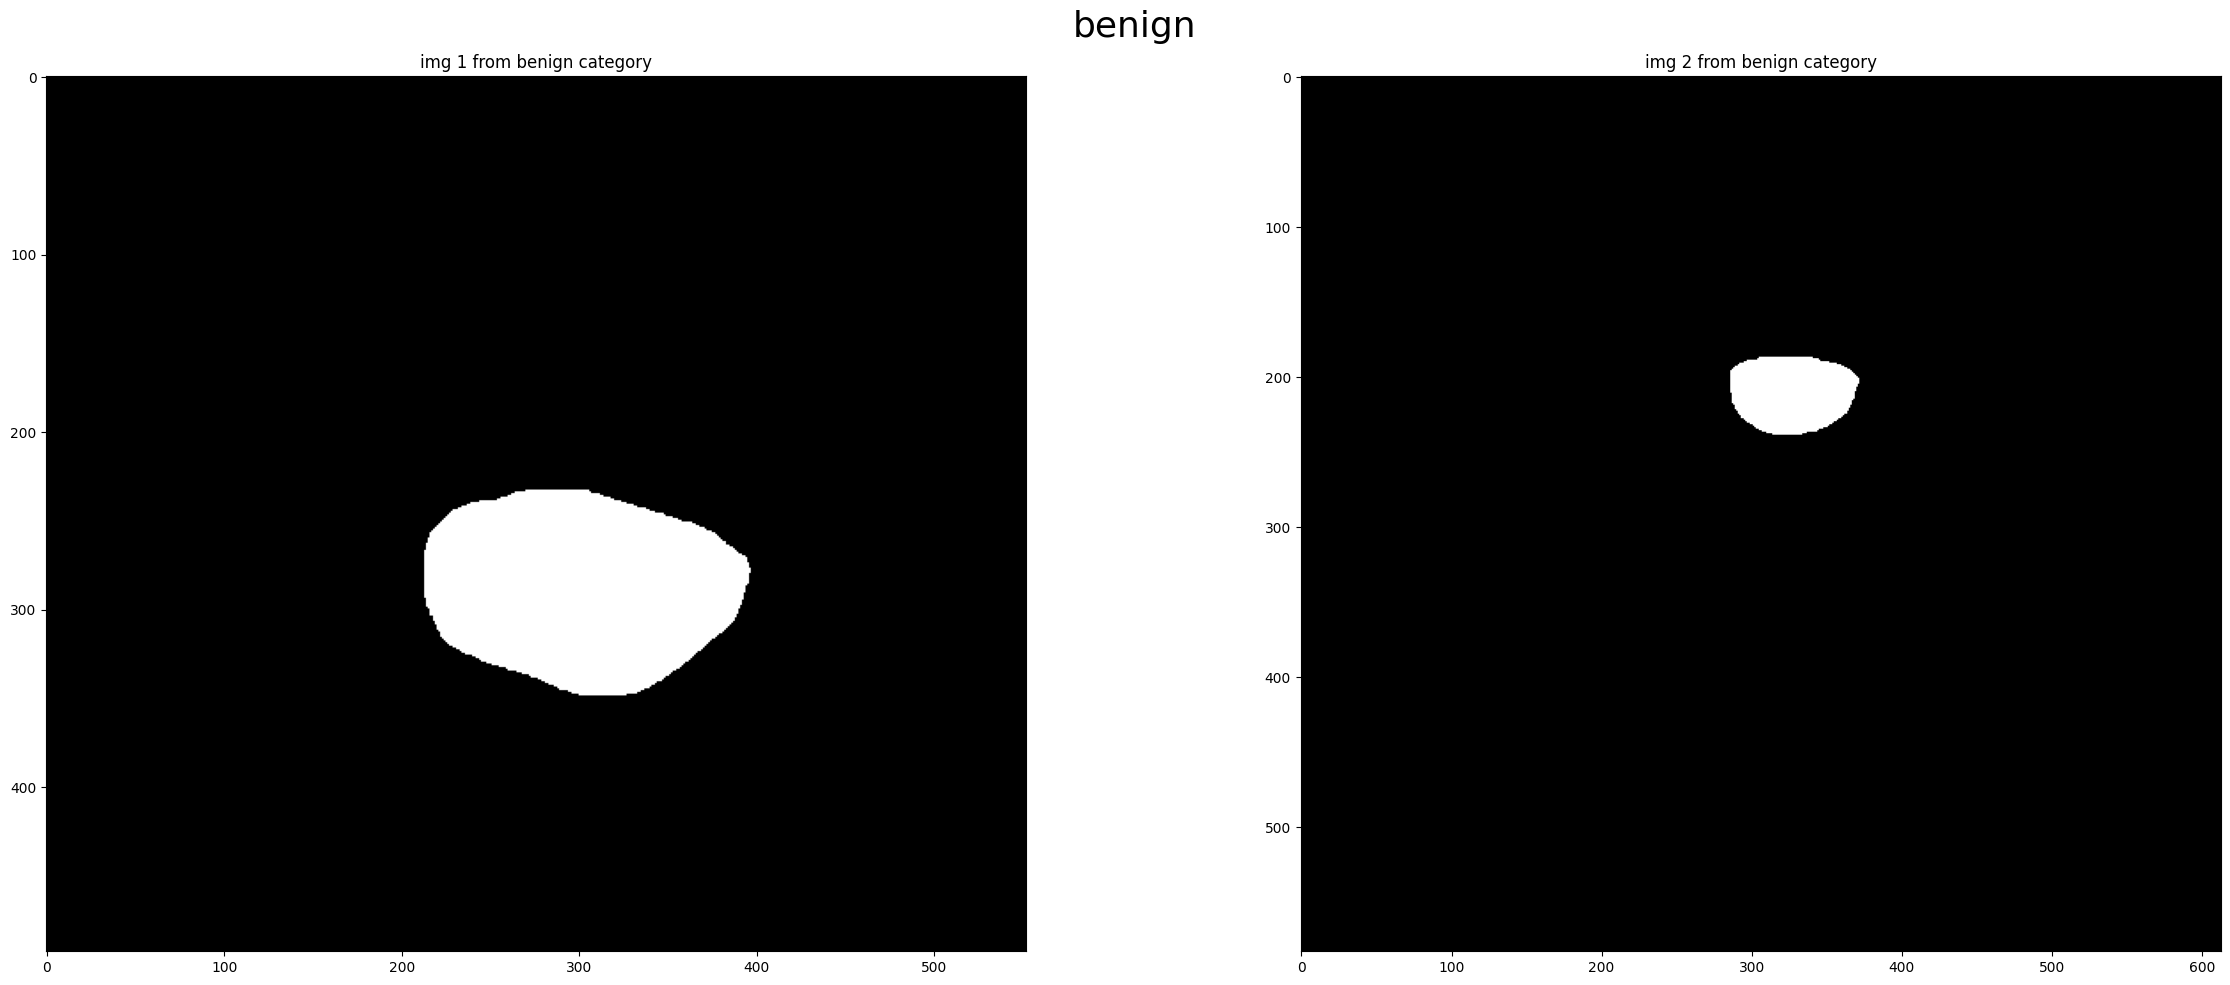

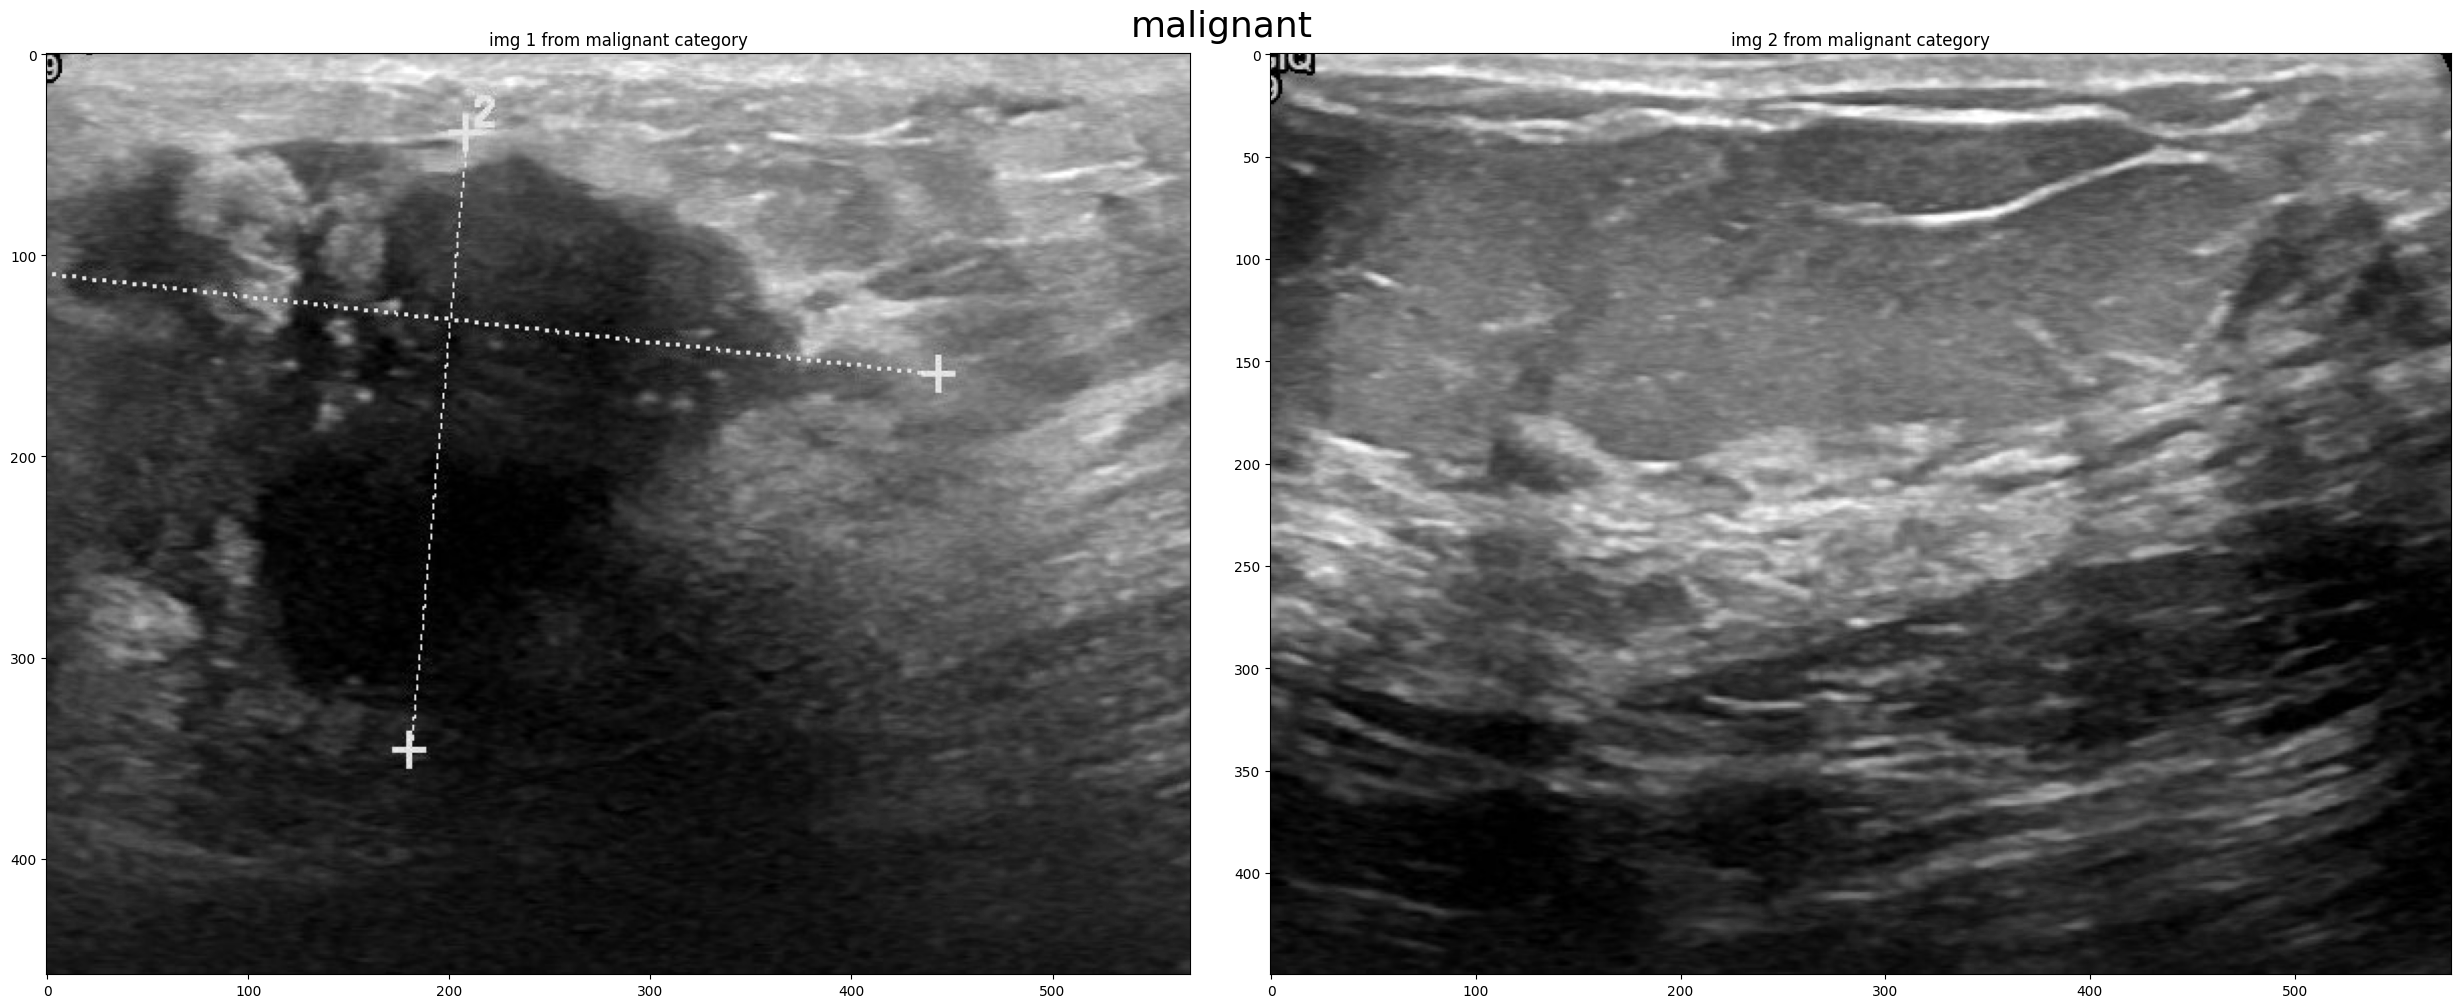

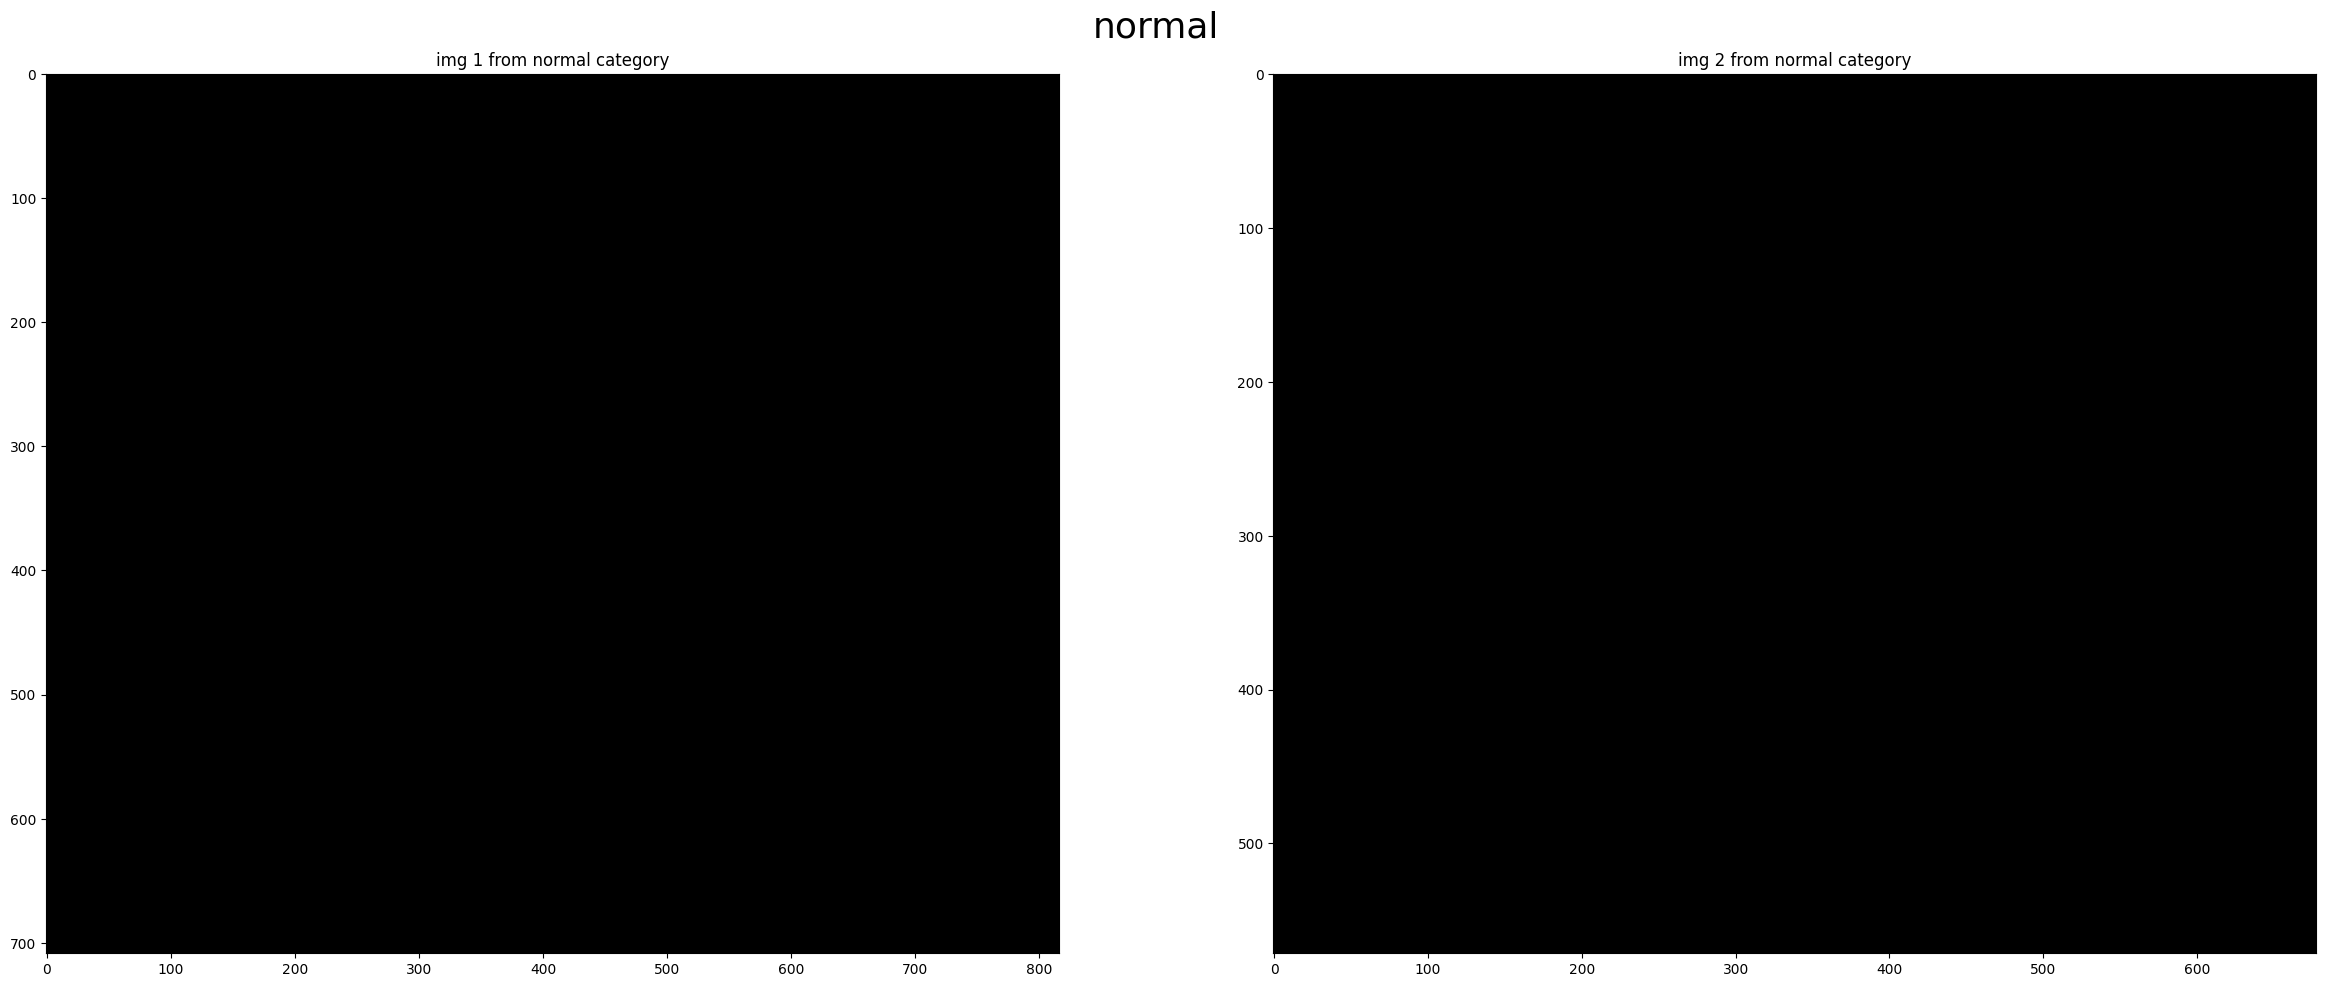

In [ ]:
# HER CLASS DAN 2 GÖRSEL ÇİZDİRME

folder_name = '/content/data/Dataset'
files_names = ['benign', 'malignant', 'normal']

for file in files_names:
    path = os.path.join(folder_name, file)
    x = 0
    fig, axes = plt.subplots(1,2, figsize=(25, 10))
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axes[x].imshow(img_array, cmap='gray')
        axes[x].set_title(f"img {x+1} from {file} category")
        x += 1
        if x == 2:
            break

    plt.suptitle(file, fontsize=26)
    plt.tight_layout()
    plt.show()

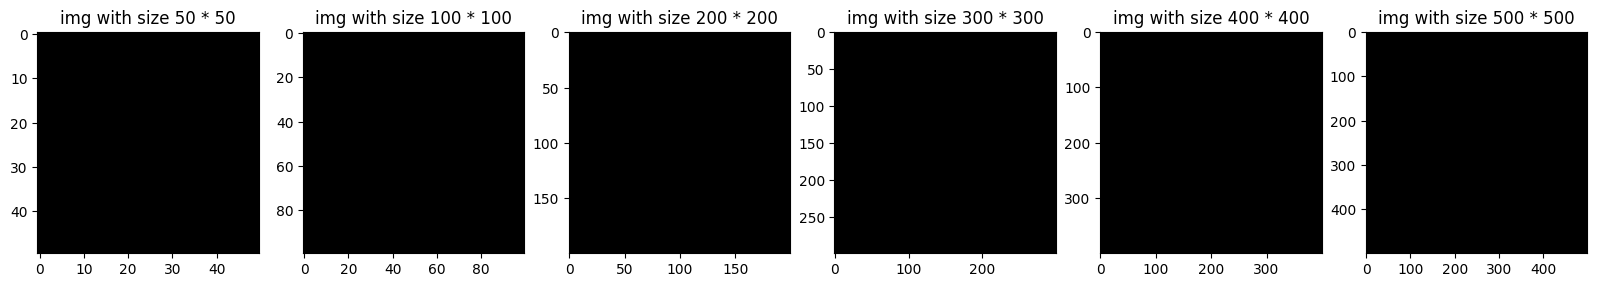

In [ ]:
img_sz = [50, 100, 200, 300, 400, 500]
plt.figure(figsize=(20, 5))

for i, sz in enumerate(img_sz):
    new_array = cv2.resize(img_array, (sz, sz))
    plt.subplot(1, len(img_sz), i+1)
    plt.imshow(new_array, cmap='gray')
    plt.title(f"img with size {sz} * {sz}")

plt.show()

In [ ]:
img_sz=300

In [ ]:
# DATAYI YÜKLEME

training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  # Include resizing
            training_data.append([new_array, class_num])

create_training_data()

benign 0


100%|██████████| 891/891 [00:04<00:00, 197.42it/s]


malignant 1


100%|██████████| 421/421 [00:02<00:00, 205.82it/s]


normal 2


100%|██████████| 266/266 [00:01<00:00, 184.79it/s]


In [ ]:
# İLK 5 GÖRSELİN SINIFINI GÖRÜNTÜLEME

for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


In [ ]:
# SON 5 GÖRSELİN SINIFLARINI GÖRÜNTÜLEME

for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 1578 : 2
Class number for image 1577 : 2
Class number for image 1576 : 2
Class number for image 1575 : 2
Class number for image 1574 : 2


In [ ]:
# ARTIK VERİLER SIRASIYLA ÖNCE İYİ HUYLU, SONRA KÖTÜ HUYLU VE ARDINDAN NORMAL GÖRÜNTÜLERE SAHİP . VERİLERİ KARIŞTIRALIM.
# KARIŞTIRMADAN SONRAKİ İLK 20 SINIFI GÖRÜNTÜLEME :

random.shuffle(training_data)

for i in range(30):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n")



Sample 1:
Class number: 0 

Sample 2:
Class number: 1 

Sample 3:
Class number: 0 

Sample 4:
Class number: 0 

Sample 5:
Class number: 0 

Sample 6:
Class number: 0 

Sample 7:
Class number: 1 

Sample 8:
Class number: 0 

Sample 9:
Class number: 1 

Sample 10:
Class number: 0 

Sample 11:
Class number: 0 

Sample 12:
Class number: 0 

Sample 13:
Class number: 0 

Sample 14:
Class number: 0 

Sample 15:
Class number: 0 

Sample 16:
Class number: 2 

Sample 17:
Class number: 2 

Sample 18:
Class number: 2 

Sample 19:
Class number: 1 

Sample 20:
Class number: 0 

Sample 21:
Class number: 2 

Sample 22:
Class number: 2 

Sample 23:
Class number: 0 

Sample 24:
Class number: 0 

Sample 25:
Class number: 1 

Sample 26:
Class number: 2 

Sample 27:
Class number: 0 

Sample 28:
Class number: 0 

Sample 29:
Class number: 0 

Sample 30:
Class number: 0 



In [ ]:
# FUTURE SELECTION (PARAMETRE SEÇİMİ)

X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

In [ ]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1578, 300, 300)
(1578,)


In [ ]:
# VERİYİ BÖLME

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1262, 224, 224, 3)
(1262,)
(316, 224, 224, 3)
(316,)


In [ ]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [ ]:
# X İN GÖRÜNTÜLERİNİ ÖLÇEKLENDİRME

X_train = X_train/255
X_test = X_test/255

In [ ]:
# DEĞERLERİ [0,1] ARALIĞINDA ÖLÇEKLENDİRME VE GÖRÜNTÜLEME
print(X_train[0])

[[0.14509804 0.76470588 0.34901961 ... 0.88235294 0.83137255 0.79215686]
 [0.31372549 0.6745098  0.01176471 ... 0.80784314 0.74901961 0.70588235]
 [0.36078431 0.65882353 0.00392157 ... 0.70196078 0.65882353 0.63529412]
 ...
 [0.13333333 0.1372549  0.1254902  ... 0.12941176 0.11764706 0.10588235]
 [0.11764706 0.1254902  0.12156863 ... 0.10980392 0.10980392 0.10980392]
 [0.11372549 0.12156863 0.1254902  ... 0.10196078 0.09803922 0.10196078]]


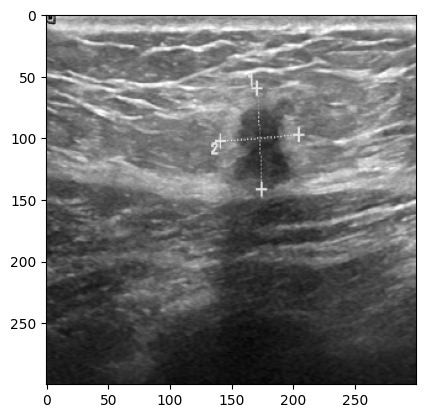

In [ ]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Veri yüklemesi ve işleme
folder_name = '/content/data/Dataset'
files_names = ['benign', 'malignant', 'normal']
img_sz = 224  # Görüntüleri DenseNet için 224x224 boyutuna yeniden boyutlandır

# Veriyi yükle ve işle
training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))
            rgb_array = cv2.cvtColor(new_array, cv2.COLOR_GRAY2RGB)  # Gri tonlamalı görüntüyü RGB'ye dönüştür
            training_data.append([rgb_array, class_num])

create_training_data()
random.shuffle(training_data)

X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Piksel değerlerini normalize et
X_train = X_train / 255.0
X_test = X_test / 255.0

# DenseNet modelini oluştur
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_sz, img_sz, 3))  # RGB için 3 kanal
base_model.trainable = False  # Temel modelin eğitilebilirliğini kapat

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Birim sayısını artır
    Dropout(0.5),  # Dropout ekle
    Dense(256, activation='relu'),
    Dropout(0.5),  # Bir dropout katmanı daha ekle
    Dense(3, activation='softmax')
])

# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Model performansını değerlendir
loss, test_accuracy = model.evaluate(X_test, y_test)
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy'])

# Sonuçları ekrana yazdır
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Train Accuracy: {train_accuracy*100:.2f}%")

# Modeli kaydet
model.save('densenet_model.h5')

100%|██████████| 266/266 [00:01<00:00, 182.57it/s]


Epoch 1/10
40/40 [==============================] - 15s 189ms/step - loss: 0.9627 - accuracy: 0.5388 - val_loss: 0.5237 - val_accuracy: 0.7848
Epoch 2/10
40/40 [==============================] - 5s 123ms/step - loss: 0.6712 - accuracy: 0.7084 - val_loss: 0.4192 - val_accuracy: 0.8228
Epoch 3/10
40/40 [==============================] - 5s 123ms/step - loss: 0.5635 - accuracy: 0.7496 - val_loss: 0.3659 - val_accuracy: 0.8418
Epoch 4/10
40/40 [==============================] - 5s 117ms/step - loss: 0.5190 - accuracy: 0.7607 - val_loss: 0.3451 - val_accuracy: 0.8829
Epoch 5/10
40/40 [==============================] - 5s 122ms/step - loss: 0.4782 - accuracy: 0.7987 - val_loss: 0.3282 - val_accuracy: 0.8513
Epoch 6/10
40/40 [==============================] - 5s 123ms/step - loss: 0.4537 - accuracy: 0.8027 - val_loss: 0.3036 - val_accuracy: 0.9209
Epoch 7/10
40/40 [==============================] - 5s 113ms/step - loss: 0.4342 - accuracy: 0.8106 - val_loss: 0.2915 - val_accuracy: 0.8924
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Kaydedilen model yüklendi.
40/40 [==============================] - 3s 86ms/step


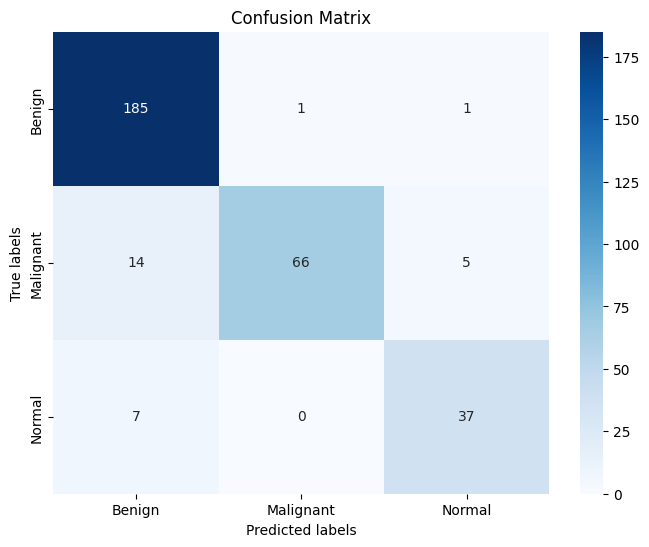


Classification Report:
              precision    recall  f1-score   support

      Benign       0.90      0.99      0.94       187
   Malignant       0.99      0.78      0.87        85
      Normal       0.86      0.84      0.85        44

    accuracy                           0.91       316
   macro avg       0.91      0.87      0.89       316
weighted avg       0.92      0.91      0.91       316






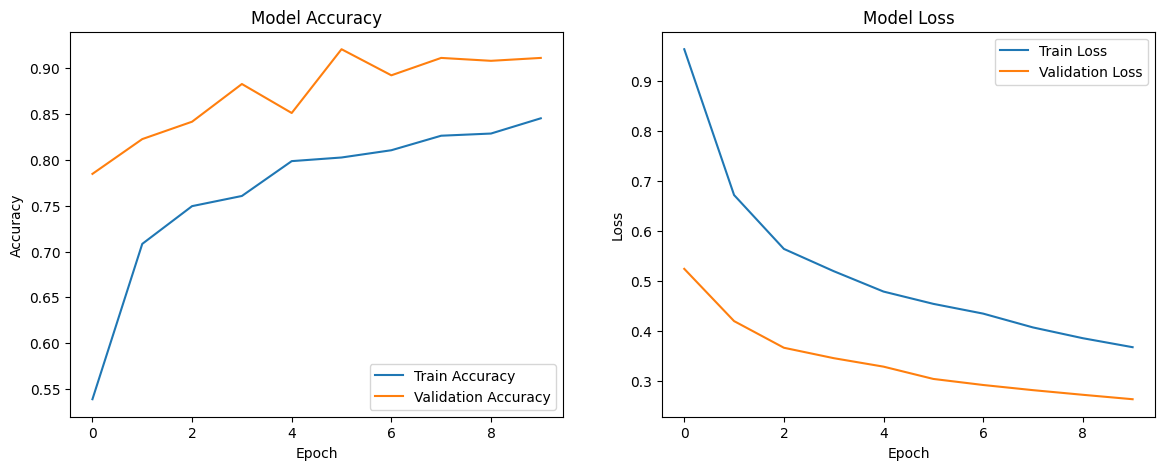

In [ ]:
# Kaydedilen modeli yükle
model_path = 'densenet_model.h5'
if os.path.exists(model_path):
    model = load_model(model_path)
    print("Kaydedilen model yüklendi.")
else:
    print("Kaydedilmiş bir model bulunamadı. Lütfen modeli eğitip kaydedin.")
    print()

# Confusion matrix ve classification report çizdirme
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.savefig("/content/DenseNet-Confusion-Matris.png")
    plt.show()


def print_classification_report(y_true, y_pred, labels):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

# Test verisi üzerinde tahmin yapma
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Validation verisi üzerinde tahmin yapma
y_pred_val = model.predict(X_train)
y_pred_val = np.argmax(y_pred_val, axis=1)

# Confusion matrix ve classification report çizdirme
labels = ['Benign', 'Malignant', 'Normal']
plot_confusion_matrix(y_test, y_pred_test, labels)
print()
print_classification_report(y_test, y_pred_test, labels)
print()

# Eğitim ve doğrulama kaybı ile eğitim ve doğrulama doğruluğunu çizme
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/DenseNet-Model-Accuracy.png")
print()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/DenseNet-Model-Loss.png")
print()

plt.show()